# Projeto de Regressão: Predição de Preços de Imóveis com o Conjunto de Dados "Ames"
Objetivo: Desenvolver um modelo de regressão para prever o logaritmo da base 10 dos preços de imóveis utilizando o conjunto de dados "Ames".  
  
**Alunos: Arthur Cisotto, Marlon Pereira**

### 1. Leitura dos dados e importação das bibliotecas

In [137]:
import pickle
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\tutuc\Dropbox\A - ARTHUR\6oSemestre\ML\Projeto1_MachineLearning_23.2\data


In [139]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [140]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [142]:
model_data = data.copy()

### 2. Preparação dos dados e Feature Engineering

#### 2.1. Features numéricas
Para as features numéricas, podemos realizar as seguintes operações:
1. **Transformações Logarítmicas**: Para as variáveis que são altamente assimétricas, podemos aplicar transformações logarítmicas para torná-las mais normalmente distribuídas.
2. **Padronização ou Normalização**: Podemos querer padronizar ou normalizar algumas das variáveis para que elas estejam na mesma escala.
3. **Criação de Variáveis Polinomiais**: Variáveis polinomiais podem ser criadas a partir das variáveis existentes, que podem ajudar a capturar relações não lineares.

In [143]:
numeric_features = model_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold',
       'Yr.Sold', 'SalePrice', 'Garage.Age', 'Remod.Age', 'House.Age'],
      dtype='object')

In [144]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

#### `Lot.Frontage`
- Lot Frontage (Continuous): Linear feet of street connected to property

A feature `Lot.Frontage` representa o tamanho da rua conectada à propriedade. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

               count       mean        std   min   25%   50%   75%    max
Lot.Frontage  2877.0  69.202989  21.204969  21.0  60.0  68.0  79.0  313.0


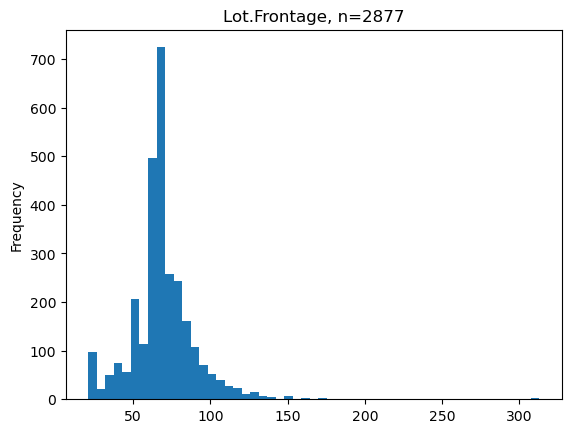

In [145]:
plot_numericals(model_data, ['Lot.Frontage'])

               count      mean       std       min       25%       50%  \
Lot.Frontage  2877.0  1.819277  0.140561  1.322219  1.778151  1.832509   

                   75%       max  
Lot.Frontage  1.897627  2.495544  


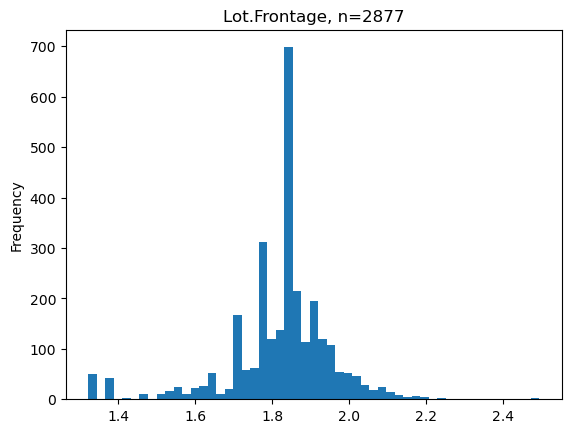

In [146]:
model_data['Lot.Frontage'] = model_data['Lot.Frontage'].apply(np.log10)
plot_numericals(model_data, ['Lot.Frontage'])

#### `Lot.Area`
- Lot Area (Continuous): Lot size in square feet

A feature `Lot.Area` representa o tamanho do lote em pés quadrados. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

           count          mean          std     min     25%     50%      75%  \
Lot.Area  2877.0  10171.366354  7833.442896  1470.0  7500.0  9490.0  11600.0   

               max  
Lot.Area  215245.0  


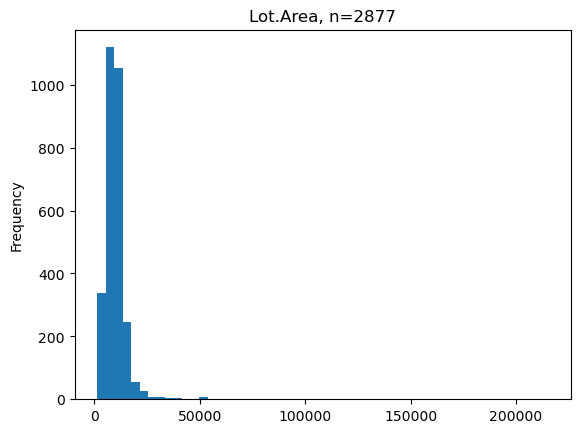

In [147]:
plot_numericals(model_data, ['Lot.Area'])

           count      mean       std       min       25%       50%       75%  \
Lot.Area  2877.0  3.951549  0.218039  3.167317  3.875061  3.977266  4.064458   

               max  
Lot.Area  5.332933  


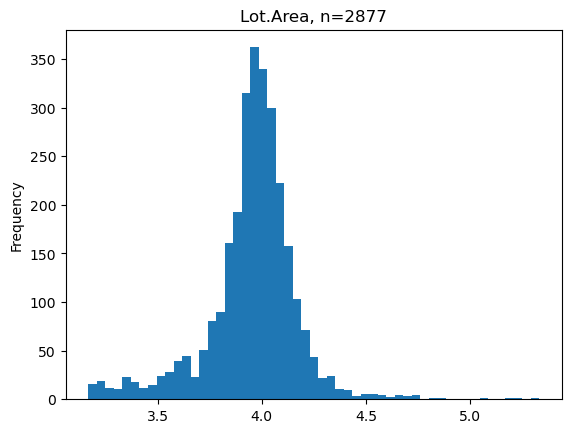

In [148]:
model_data['Lot.Area'] = model_data['Lot.Area'].apply(np.log10)
plot_numericals(model_data, ['Lot.Area'])

#### `Mas.Vnr.Area`
- Mas Vnr Area (Continuous): Masonry veneer area in square feet

A feature `Mas.Vnr.Area` representa a área de alvenaria em pés quadrados. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída. Se apenas aplicarmos uma transformação logarítmica, teremos um erro, pois existem valores nulos. Portanto, primeiro podemos somar 1 a todos os valores e, em seguida, aplicar a transformação logarítmica.

               count       mean         std  min  25%  50%    75%     max
Mas.Vnr.Area  2877.0  102.87626  179.732526  0.0  0.0  0.0  166.0  1600.0


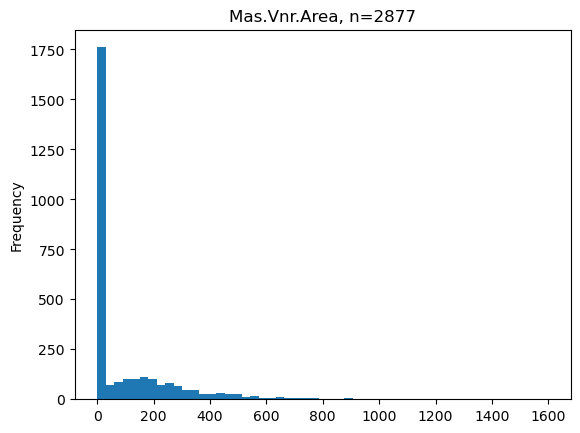

In [149]:
plot_numericals(model_data, ['Mas.Vnr.Area'])

               count      mean       std  min  25%  50%       75%       max
Mas.Vnr.Area  2877.0  0.916184  1.141249  0.0  0.0  0.0  2.222716  3.204391


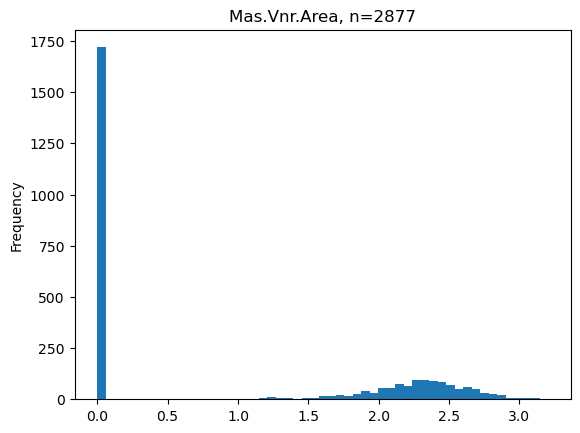

In [150]:
# Adicionando uma constante antes de aplicar o logaritmo
model_data['Mas.Vnr.Area'] = model_data['Mas.Vnr.Area'].apply(lambda x: np.log10(x+1))
plot_numericals(model_data, ['Mas.Vnr.Area'])

#### `BsmtFin.SF.1`
- BsmtFin SF 1 (Continuous): Type 1 finished square feet

A feature `BsmtFin.SF.1` representa a área acabada do porão do tipo 1 em pés quadrados. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída. Se apenas aplicarmos uma transformação logarítmica, teremos um erro, pois existem valores nulos. Portanto, primeiro podemos somar 1 a todos os valores e, em seguida, aplicar a transformação logarítmica.

               count        mean         std  min  25%    50%    75%     max
BsmtFin.SF.1  2877.0  445.111922  456.415687  0.0  0.0  374.0  735.0  5644.0


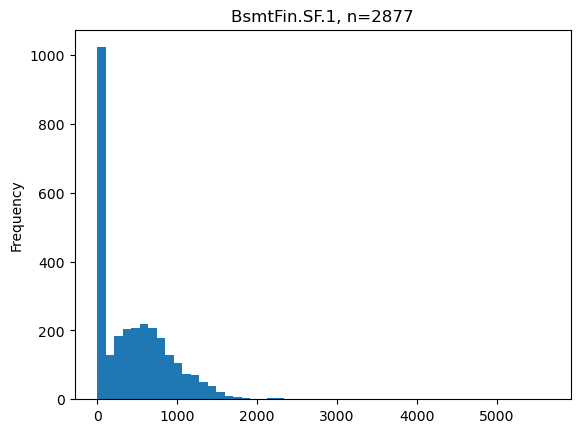

In [151]:
plot_numericals(model_data, ['BsmtFin.SF.1'])

               count      mean       std  min  25%       50%       75%  \
BsmtFin.SF.1  2877.0  1.847639  1.291243  0.0  0.0  2.574031  2.866878   

                   max  
BsmtFin.SF.1  3.751664  


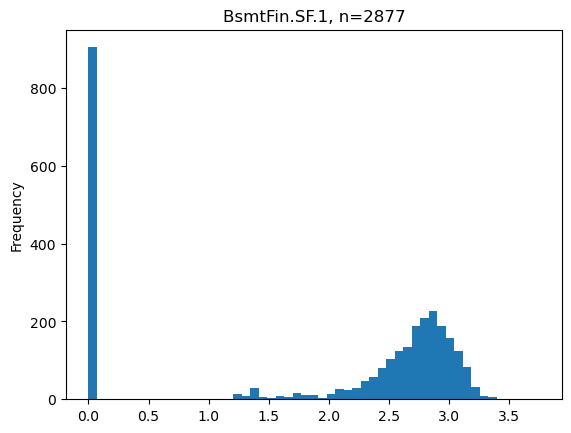

In [152]:
model_data['BsmtFin.SF.1'] = model_data['BsmtFin.SF.1'].apply(lambda x: np.log10(x+1))
plot_numericals(model_data, ['BsmtFin.SF.1'])

#### 2.2. Features categóricas
TODO:
- [ ] Tratar valores faltantes
- [ ] Tratar outliers
- [ ] Criar novas features que façam sentido
- [ ] Explicações e análises
- [ ] **FAZER ENCODING**

#### 2.3. Features ordinais
TODO:
- [ ] Tratar valores faltantes
- [ ] Tratar outliers
- [ ] Criar novas features que façam sentido
- [ ] Explicações e análises
- [ ] **FAZER ENCODING**

### 3. Modelagem
- [ ] Train-test split
- [ ] Escolha de métrica de avaliação
- [ ] Escolha de modelo
- [ ] Tuning de hiperparâmetros

### Train Test Split

In [153]:
def split_features_target(df):
    target_column = 'SalePrice'
    X = df.drop(columns=[target_column]).copy()
    y = df[target_column].copy()
    return X, y


In [154]:
X, y = split_features_target(model_data)

In [166]:
# train test validation split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)


(1840, 69) (576, 69) (461, 69)


In [167]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

### ISOLANDO OS ATRIBUTOS NUMÉRICOS E CATEGÓRICOS ###
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(include=['category']).astype('str')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        # Nota: include_bias=False porque o bias (termo constante) já estará incluso no regressor linear.
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ])

cat_pipeline = Pipeline([
        #Nota: drop='first' para evitar a colinearidade que não funcionaria com um modelo de regressão linear 
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')),
    ])

### TRANSFORMAÇÃO DOS ATRIBUTOS NUMÉRICOS E CATEGÓRICOS ###
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_train = X_train_num.join(X_train_cat)

### APLICAÇÃO DA TRANSFORMAÇÃO ###
X_train_prepared = full_pipeline.fit_transform(X_train)

c:\Users\tutuc\anaconda3\envs\ames\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [168]:
# grid search com LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept': [True, False]}
]

lin_reg = LinearRegression()
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_lin_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'fit_intercept': True}
LinearRegression()


In [169]:
# grid search com RidgeCV
param_grid = [
    {'fit_intercept': [True, False],
     'alphas': [np.logspace(-4, 2, 10)]}
]

ridge_reg = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, scoring='neg_mean_squared_error')
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_ridge_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)


{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True}
RidgeCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
        cv=5, scoring='neg_mean_squared_error')
100.0
5.161926306348965
[ 6.40534718e-03  8.93983129e-03 -2.26571634e-04  1.34798249e-02
 -6.18507435e-04  1.30387633e-03  1.98672514e-02  2.01295394e-02
  1.35465933e-02 -1.05891492e-03  2.69391429e-02  4.32615711e-03
 -8.15351314e-05  1.10660595e-02  9.28332673e-03 -3.28064396e-03
 -4.78251813e-03  5.95313945e-03  1.10049922e-02  1.08727054e-02
  5.47394387e-03  5.71063814e-03  4.99060791e-03  2.18219553e-03
  7.39207924e-04  5.80840596e-03  1.10814141e-04 -1.51632709e-03
  8.50271639e-04 -1.90189012e-04 -1.06510184e-02 -1.624414

In [170]:
# grid search com LassoCV
param_grid = [
    {'fit_intercept': [True, False],
     'alphas': [np.logspace(-4, 2, 10)]}
]

lasso_reg = LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, max_iter=10000, tol=0.01, random_state=42)
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_lasso_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)



{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True}
LassoCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
        cv=5, max_iter=10000, random_state=42, tol=0.01)
0.00046415888336127773
5.14981677181216
[ 4.47250591e-03  9.16327989e-03  0.00000000e+00  1.40883335e-02
 -0.00000000e+00 -5.05048586e-04  1.92671581e-02  3.48915711e-02
  3.17035295e-02  0.00000000e+00  2.54193019e-02  2.97256689e-03
  0.00000000e+00  6.55887420e-03  4.77214385e-03 -3.40260817e-03
 -2.50376490e-03  0.00000000e+00  9.03478953e-03  1.69185631e-02
  0.00000000e+00  3.81225978e-03  4.13488319e-03  1.33780277e-03
  0.00000000e+00  4.82379764e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 

In [171]:
# grid search com ElasticNetCV

param_grid = [
    {'fit_intercept': [True, False],
     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
     'alphas': [np.logspace(-4, 2, 10)]}
]

elastic_net_reg = ElasticNetCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, max_iter=10000, tol=0.01, random_state=42)
grid_search = GridSearchCV(elastic_net_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_elastic_net_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.l1_ratio_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)



{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True, 'l1_ratio': 0.5}
ElasticNetCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
             cv=5, max_iter=10000, random_state=42, tol=0.01)
0.00046415888336127773
0.5
5.143536608185546
[ 5.13375933e-03  9.99323429e-03 -0.00000000e+00  1.20626335e-02
 -0.00000000e+00 -2.06352297e-03  2.00723381e-02  3.55421375e-02
  3.18413104e-02  0.00000000e+00  2.22922216e-02  2.39614188e-03
  0.00000000e+00  6.61720992e-03  5.79570835e-03 -3.45243804e-03
 -3.39604775e-03  0.00000000e+00  8.16723750e-03  1.51640320e-02
  8.01393131e-05  4.97623292e-03  3.93248131e-03  1.34885542e-03
  0.00000000e+00  4.99644334e-03  0.00000000e+00  0.00000000e+00
 

### 4. Avaliação do Desempenho
TODO:
- [ ] Avaliação do desempenho de diferentes modelos
- [ ] Análise de resíduos
- [ ] Análise de importância de features

In [172]:
# Avaliação dos modelos
from sklearn.metrics import mean_squared_error, accuracy_score

def evaluate_model(model, X, y):
    X_prepared = full_pipeline.transform(X)
    y_pred = model.predict(X_prepared)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    accuracy = model.score(X_prepared, y)
    return rmse, accuracy

print('LinearRegression')
print(evaluate_model(best_lin_reg, X_train, y_train))

print('RidgeCV')
print(evaluate_model(best_ridge_reg, X_train, y_train))

print('LassoCV')
print(evaluate_model(best_lasso_reg, X_train, y_train))

print('ElasticNetCV')
print(evaluate_model(best_elastic_net_reg, X_train, y_train))



LinearRegression
(0.03185950424807982, 0.9655606669145289)
RidgeCV
(0.042416599834128994, 0.9389552373469494)
LassoCV


(0.04376835693011, 0.9350024192276563)
ElasticNetCV
(0.03907497515479641, 0.948194707922156)


In [173]:
# Avaliação dos modelos com validação cruzada
from sklearn.model_selection import cross_val_score

def evaluate_model_cv(model, X, y):
    X_num = X.select_dtypes(include=[np.number])
    X_cat = X.select_dtypes(include=['category', 'object']).astype('str')
    X = X_num.join(X_cat)
    X_prepared = full_pipeline.transform(X)
    scores = cross_val_score(model, X_prepared, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())
    return rmse_scores

print('LinearRegression')
rmse_scores_lin_reg = evaluate_model_cv(best_lin_reg, X_train, y_train)

print('RidgeCV')
rmse_scores_ridge_reg = evaluate_model_cv(best_ridge_reg, X_train, y_train)

print('LassoCV')
rmse_scores_lasso_reg = evaluate_model_cv(best_lasso_reg, X_train, y_train)

print('ElasticNetCV')
rmse_scores_elastic_net_reg = evaluate_model_cv(best_elastic_net_reg, X_train, y_train)



LinearRegression
Scores: [0.06935585 0.16403259 0.08562699 0.14637662 0.16329437]
Mean: 0.12573728469908757
Standard deviation: 0.040226232484949026
RidgeCV
Scores: [0.06552335 0.05743423 0.1117982  0.069768   0.05947771]
Mean: 0.07280029917140399
Standard deviation: 0.019982956201711363
LassoCV
Scores: [0.056415   0.05226404 0.07029371 0.06463281 0.04986178]
Mean: 0.05869346869900512
Standard deviation: 0.007672926776194262
ElasticNetCV
Scores: [0.05553473 0.0525827  0.06785847 0.06152929 0.05213417]
Mean: 0.05792787019730796
Standard deviation: 0.0059908591213740795


Escolha entre LASSO e ElasticNet

In [174]:
from scipy.stats import mannwhitneyu
U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_ridge_reg)
print('LinearRegression vs RidgeCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_lasso_reg)
print('LinearRegression vs LassoCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_elastic_net_reg)
print('LinearRegression vs ElasticNetCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_ridge_reg, rmse_scores_lasso_reg)
print('RidgeCV vs LassoCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_ridge_reg, rmse_scores_elastic_net_reg)
print('RidgeCV vs ElasticNetCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lasso_reg, rmse_scores_elastic_net_reg)
print('LassoCV vs ElasticNetCV')
print(pvalue)




LinearRegression vs RidgeCV
0.05555555555555555
LinearRegression vs LassoCV
0.015873015873015872
LinearRegression vs ElasticNetCV
0.007936507936507936
RidgeCV vs LassoCV
0.2222222222222222
RidgeCV vs ElasticNetCV
0.15079365079365079
LassoCV vs ElasticNetCV
1.0


In [179]:
# Tendo o melhor modelo, treinar com todos os dados de treino e avaliar com os dados de teste
from sklearn.metrics import mean_squared_error, accuracy_score

best_model = best_elastic_net_reg

X_test_num = X_test.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(include=['category', 'object']).astype('str')

X_test_prepared = X_test_num.join(X_test_cat)

X_test_prepared = full_pipeline.transform(X_test_prepared)

y_pred = best_model.predict(X_test_prepared)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = best_model.score(X_test_prepared, y_test)

print(rmse)
print(accuracy)



0.05296772675492641
0.9049801435365025


c:\Users\tutuc\anaconda3\envs\ames\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
